Time series data of COVID PCR test results across US

In [30]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [31]:
df=pd.read_csv('covid_pcr_results_200114.csv')

In [32]:
df.shape

(110691, 9)

In [33]:
df.head()

,state,state_name,state_fips,fema_region,overall_outcome,date,new_results_reported,total_results_reported,geocoded_state
0,AL,Alabama,1,Region 4,Negative,2020/03/01,96,96,NaN
1,AL,Alabama,1,Region 4,Positive,2020/03/01,16,16,NaN
2,AL,Alabama,1,Region 4,Negative,2020/03/02,72,168,NaN
3,AL,Alabama,1,Region 4,Positive,2020/03/02,6,22,NaN
4,AL,Alabama,1,Region 4,Negative,2020/03/03,94,262,NaN


In [34]:
df.dtypes

state                      object
state_name                 object
state_fips                  int64
fema_region                object
overall_outcome            object
date                       object
new_results_reported        int64
total_results_reported      int64
geocoded_state            float64
dtype: object

In [35]:
# Made date date and reindex
df.date = pd.to_datetime(df.date)
df = df.set_index('date').sort_index()

In [36]:
df.sample(25)

,state,state_name,state_fips,fema_region,overall_outcome,new_results_reported,total_results_reported,geocoded_state
date,,,,,,,,
2021-12-07,SC,South Carolina,45,Region 4,Positive,1012,981007,NaN
2021-07-25,CT,Connecticut,9,Region 1,Positive,220,477604,NaN
2020-10-20,NY,New York,36,Region 2,Negative,103244,12624120,NaN
2021-11-22,WV,West Virginia,54,Region 3,Positive,567,323774,NaN
2021-06-25,OR,Oregon,41,Region 10,Positive,179,203904,NaN
...,...,...,...,...,...,...,...,...
2020-04-06,WI,Wisconsin,55,Region 5,Inconclusive,1,8,NaN
2021-01-29,IA,Iowa,19,Region 7,Positive,864,322314,NaN
2020-09-06,RI,Rhode Island,44,Region 1,Negative,3719,487654,NaN


In [37]:
df.state_fips.nunique()

56

States plus territories (DC, Puerto Rico, Guam, Northern Mariana Islands, U.S. Virgin Islands, Marshall Islands)

In [38]:
df.state_name.value_counts()

Washington                  2046
Nebraska                    2043
Florida                     2040
New York                    2039
Illinois                    2038
Massachusetts               2036
Nevada                      2035
Idaho                       2034
California                  2032
Pennsylvania                2032
Louisiana                   2032
Kansas                      2032
Ohio                        2031
Alabama                     2031
New Hampshire               2031
Georgia                     2030
North Carolina              2029
Tennessee                   2028
Texas                       2028
Colorado                    2028
South Carolina              2027
Oregon                      2026
Oklahoma                    2026
Wisconsin                   2025
Missouri                    2024
Virginia                    2024
Mississippi                 2023
Connecticut                 2023
New Jersey                  2023
Utah                        2023
Maine     

Is there a geographic subdivision finer than state level?

There are 10 FEMA regions representing multi-state areas (more course, not fine)

![FEMA Regions](fema_regions.png)

In [39]:
df.head()

,state,state_name,state_fips,fema_region,overall_outcome,new_results_reported,total_results_reported,geocoded_state
date,,,,,,,,
2020-03-01,AL,Alabama,1,Region 4,Negative,96,96,NaN
2020-03-01,WA,Washington,53,Region 10,Inconclusive,1,1,NaN
2020-03-01,AK,Alaska,2,Region 10,Negative,4,4,NaN
2020-03-01,TN,Tennessee,47,Region 4,Negative,1,1,NaN
2020-03-01,SC,South Carolina,45,Region 4,Positive,4,4,NaN


In [40]:
# Null value counts

df.isna().sum()

state                          0
state_name                     0
state_fips                     0
fema_region                    0
overall_outcome                0
new_results_reported           0
total_results_reported         0
geocoded_state            110691
dtype: int64

In [41]:
df.shape

(110691, 8)

In [42]:
texas = df[df['state_name']=='Texas']

In [43]:
texas.head()

,state,state_name,state_fips,fema_region,overall_outcome,new_results_reported,total_results_reported,geocoded_state
date,,,,,,,,
2020-03-02,TX,Texas,48,Region 6,Negative,2,2,NaN
2020-03-03,TX,Texas,48,Region 6,Negative,4,6,NaN
2020-03-04,TX,Texas,48,Region 6,Negative,10,16,NaN
2020-03-05,TX,Texas,48,Region 6,Positive,1,1,NaN
2020-03-05,TX,Texas,48,Region 6,Negative,10,26,NaN


In [44]:
df=texas

In [45]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2020-03-02 00:00:00 to 2022-01-11 00:00:00
Shape: (2028, 8)


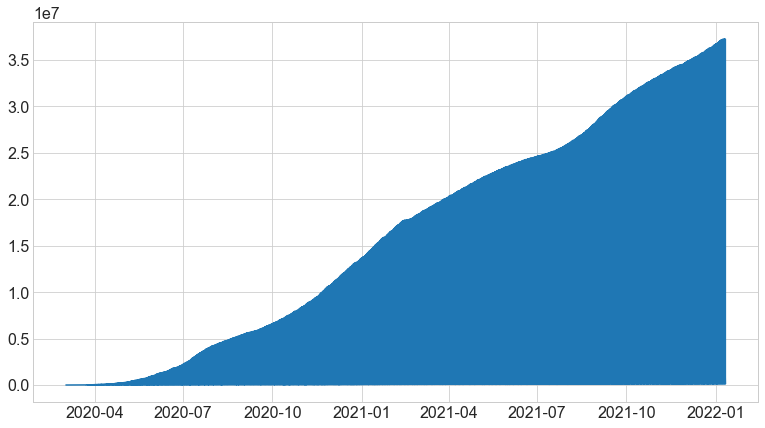

In [47]:
plt.plot(df.index, df.total_results_reported)

In [48]:
texas.head()

,state,state_name,state_fips,fema_region,overall_outcome,new_results_reported,total_results_reported,geocoded_state
date,,,,,,,,
2020-03-02,TX,Texas,48,Region 6,Negative,2,2,NaN
2020-03-03,TX,Texas,48,Region 6,Negative,4,6,NaN
2020-03-04,TX,Texas,48,Region 6,Negative,10,16,NaN
2020-03-05,TX,Texas,48,Region 6,Positive,1,1,NaN
2020-03-05,TX,Texas,48,Region 6,Negative,10,26,NaN
